# 데이터 준비

In [ ]:
from google.colab import drive
import os

drive.mount('./drive', force_remount=True)

Mounted at ./drive


In [ ]:
!unzip '/content/drive/MyDrive/Colab Notebooks/KDT-STUDY/titanic-e/도배하자/open.zip'

Archive:  /content/drive/MyDrive/Colab Notebooks/KDT-STUDY/titanic-e/도배하자/open.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
   creating: test/
  inflating: test/000.png            
  inflating: test/001.png            
  inflating: test/002.png            
  inflating: test/003.png            
  inflating: test/004.png            
  inflating: test/005.png            
  inflating: test/006.png            
  inflating: test/007.png            
  inflating: test/008.png            
  inflating: test/009.png            
  inflating: test/010.png            
  inflating: test/011.png            
  inflating: test/012.png            
  inflating: test/013.png            
  inflating: test/014.png            
  inflating: test/015.png            
  inflating: test/016.png            
  inflating: test/017.png            
  inflating: test/018.png            
  inflating: test/019.png            
  inflating: test/020.png            
  inflating: test/02

# EDA

In [ ]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

import seaborn as sns

from PIL import Image, ImageFile
from tqdm import tqdm

%matplotlib inline
ImageFile.LOAD_TRUNCATED_IMAGES = True

## 한글폰트 사용

In [ ]:
# matplotlib 한글 폰트 다운
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

In [ ]:
sys_font = fm.findSystemFonts()
nanum_font = [fm.FontProperties(fname=f, size=10).get_name() for f in sys_font if 'Nanum' in f]
print(nanum_font)
plt.rc('font', family='NanumBarunGothic') 
mpl.rcParams['axes.unicode_minus'] = False
## 런타임 재시작 필요!!

['NanumMyeongjo', 'NanumGothic', 'NanumSquare', 'NanumSquareRound', 'NanumGothic', 'NanumSquare', 'NanumSquareRound', 'NanumMyeongjo', 'NanumBarunGothic', 'NanumBarunGothic']


## 이미지 시각화

In [ ]:
ROOT_PATH = './'
TRAIN_PATH = os.path.join(ROOT_PATH, 'train')
TEST_PATH = os.path.join(ROOT_PATH, 'test')

In [ ]:
labels = os.listdir(TRAIN_PATH)

img_samples = []

for label in labels:
    cur_path = os.path.join(TRAIN_PATH, label)
    cur_files = os.listdir(cur_path)[:8]
    cur_files = list(map(lambda x: os.path.join(cur_path, x), cur_files))
    img_samples.append((cur_files, label))


plt.rcParams['savefig.bbox'] = 'tight'

def plot(imgs, **imshow_kwargs):
    num_rows = max([len(x[0]) for x in imgs])
    num_cols = len(imgs)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False, figsize=(15, 15))
    for col_idx, (col, label) in enumerate(imgs):
        axs[0, col_idx].set_title(label)
        for row_idx, img_path in enumerate(col):        
            img = Image.open(img_path)
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), **imshow_kwargs)
            ax.axis('off')
    plt.tight_layout()


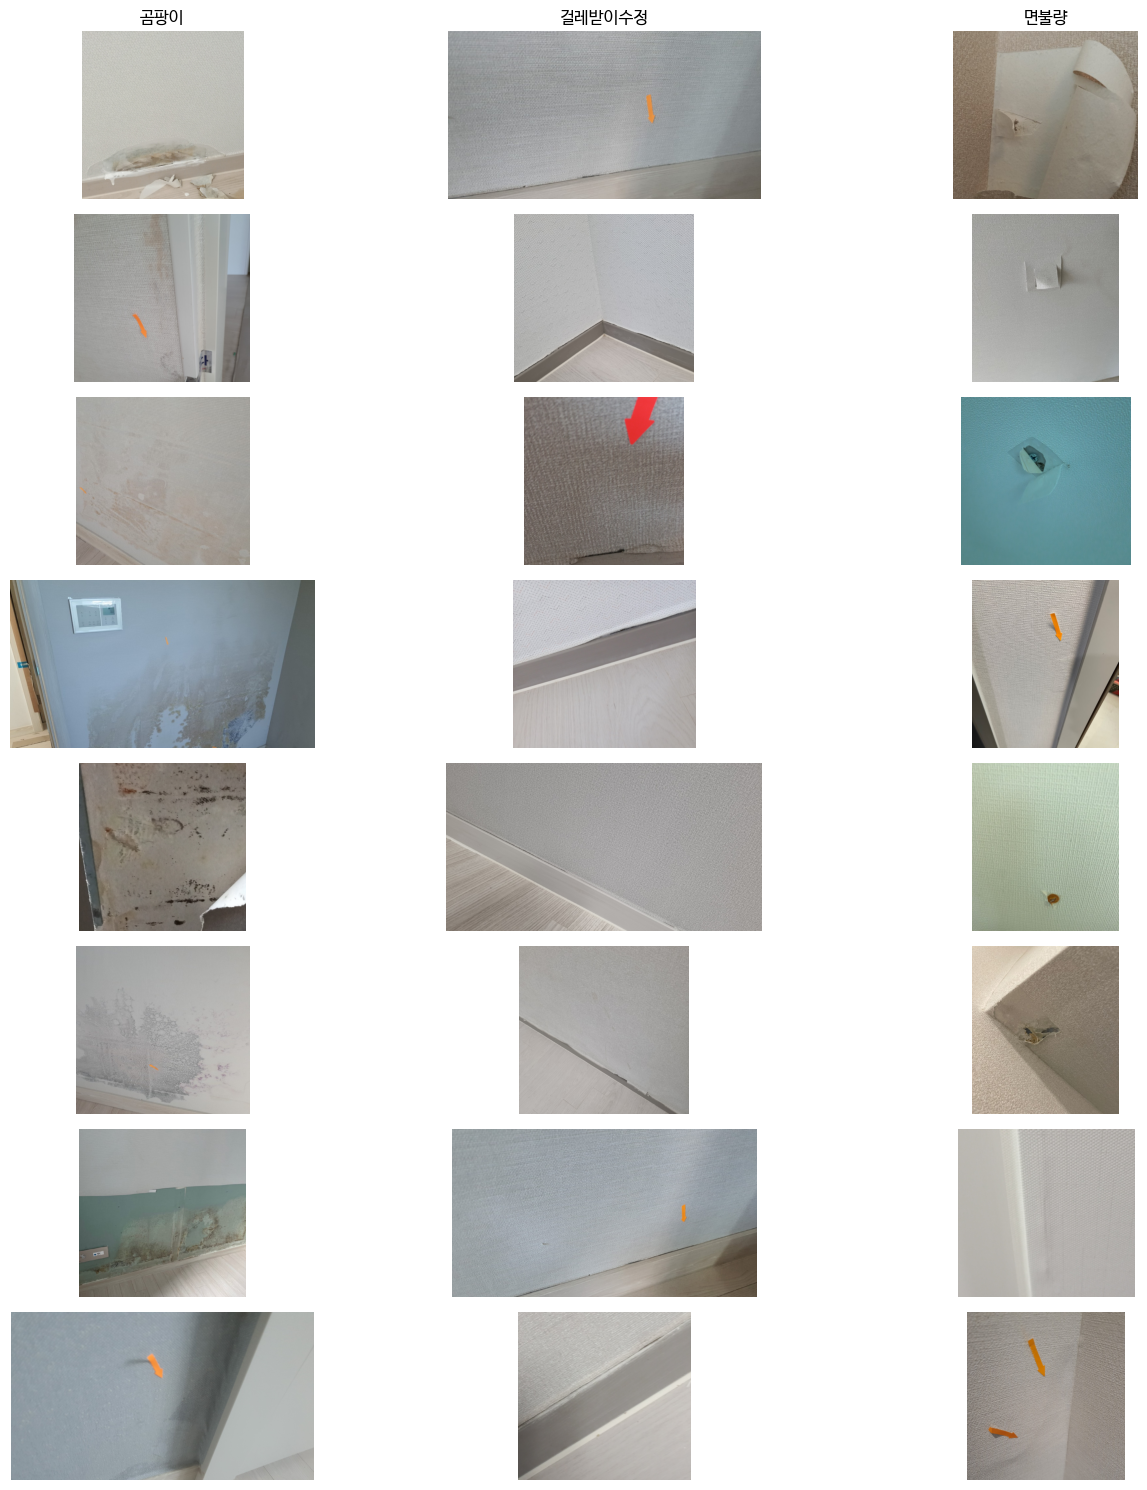

In [ ]:
plot(img_samples[:3])

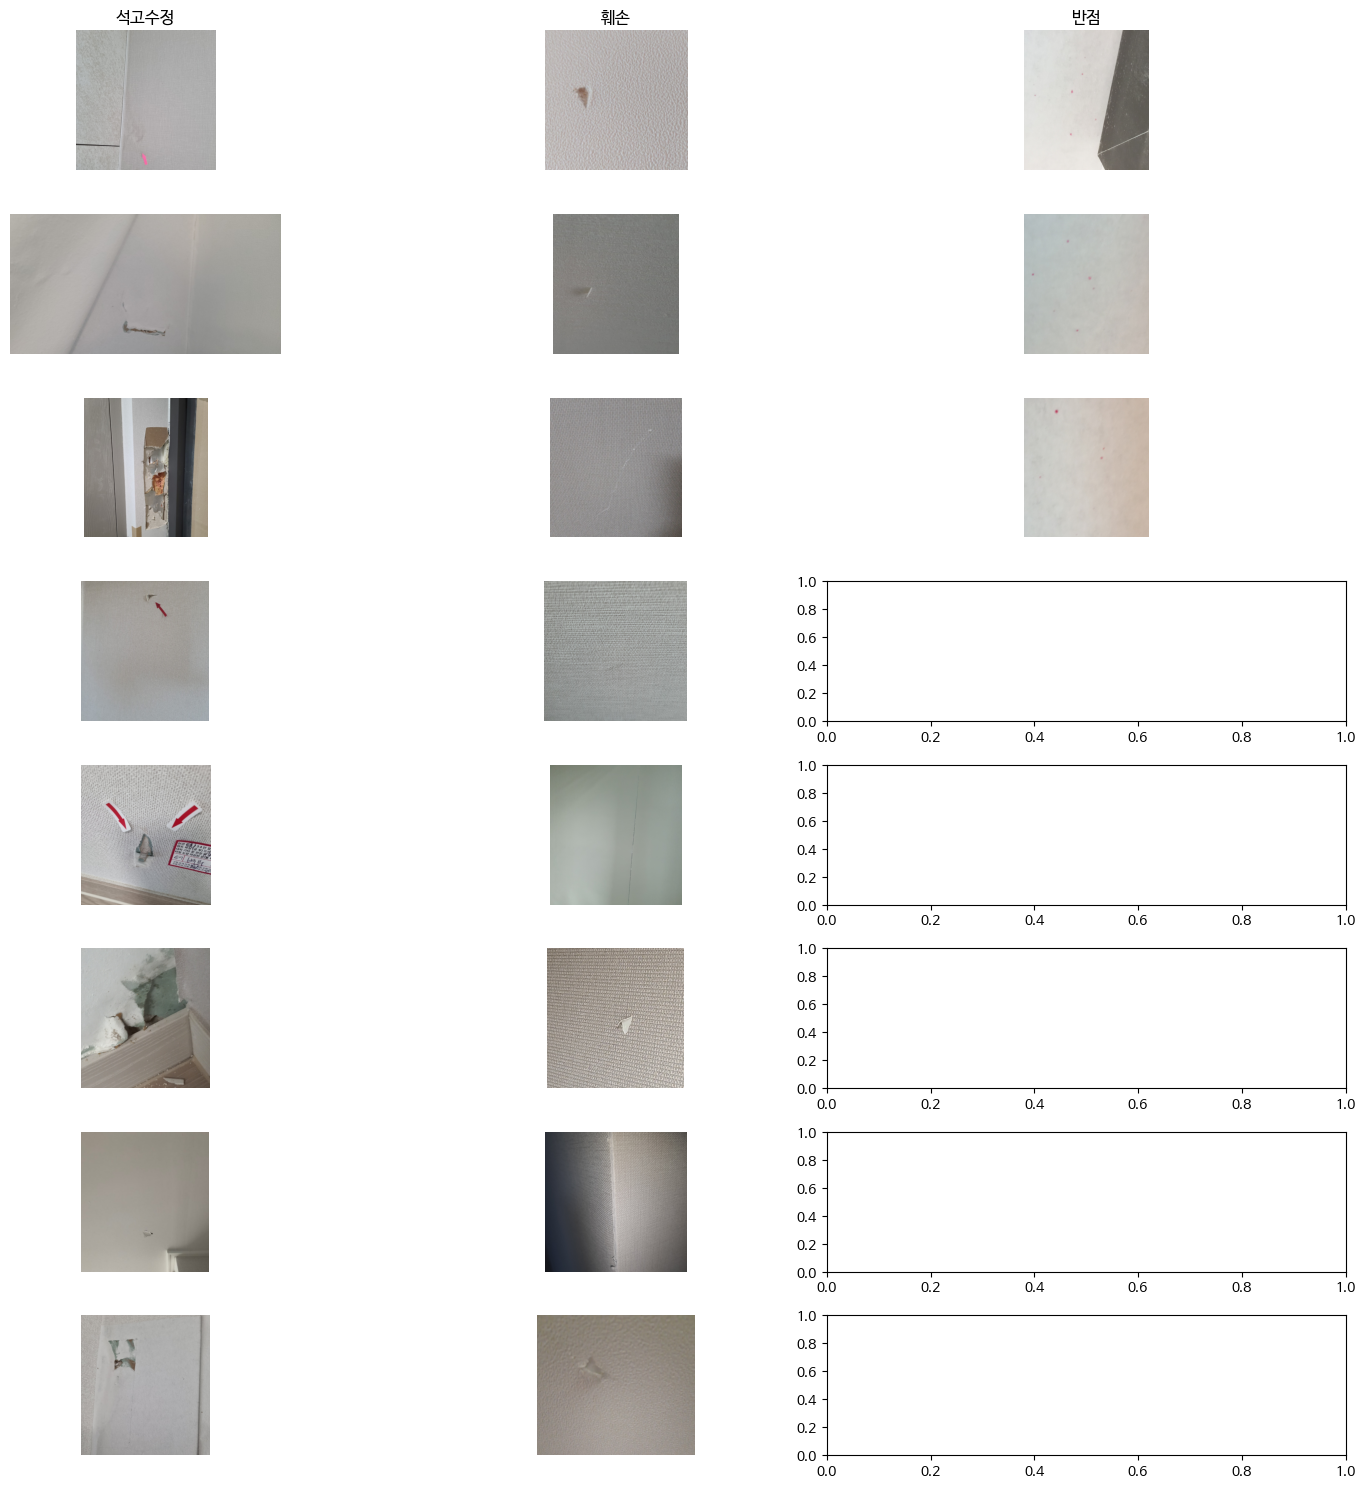

In [ ]:
plot(img_samples[3:6])

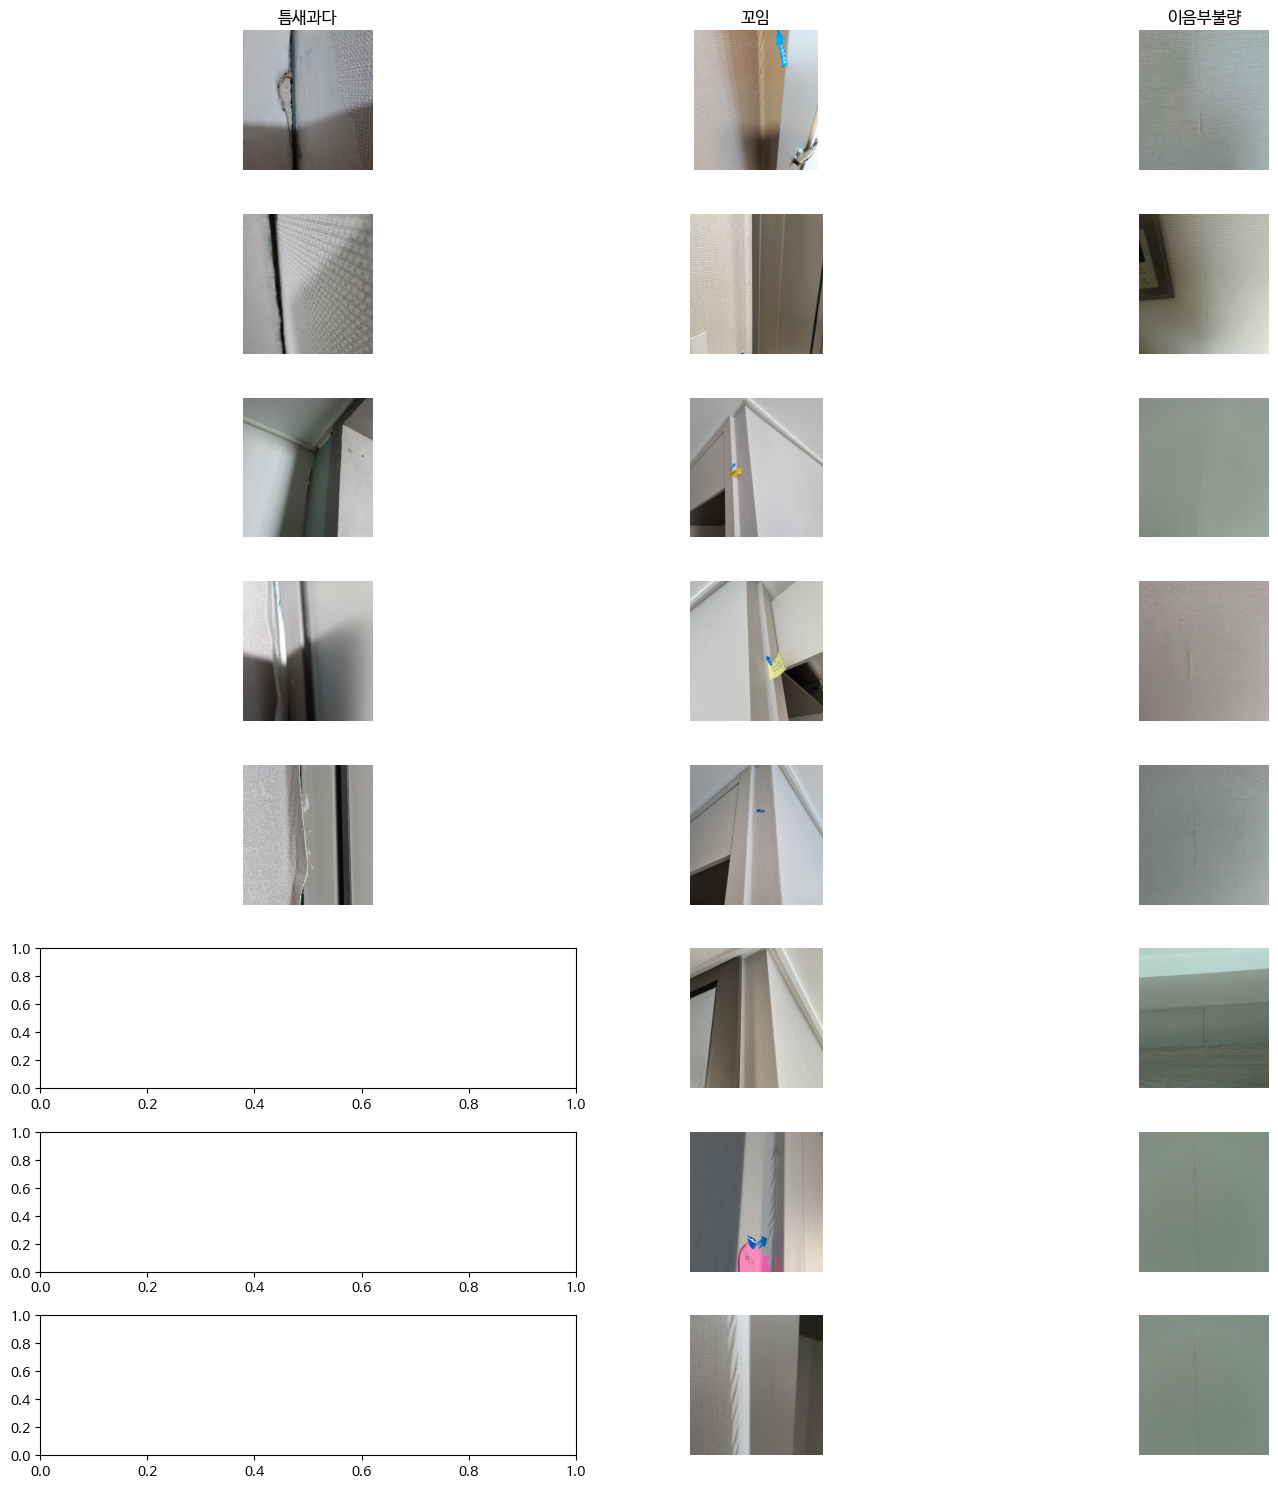

In [ ]:
plot(img_samples[6:9])

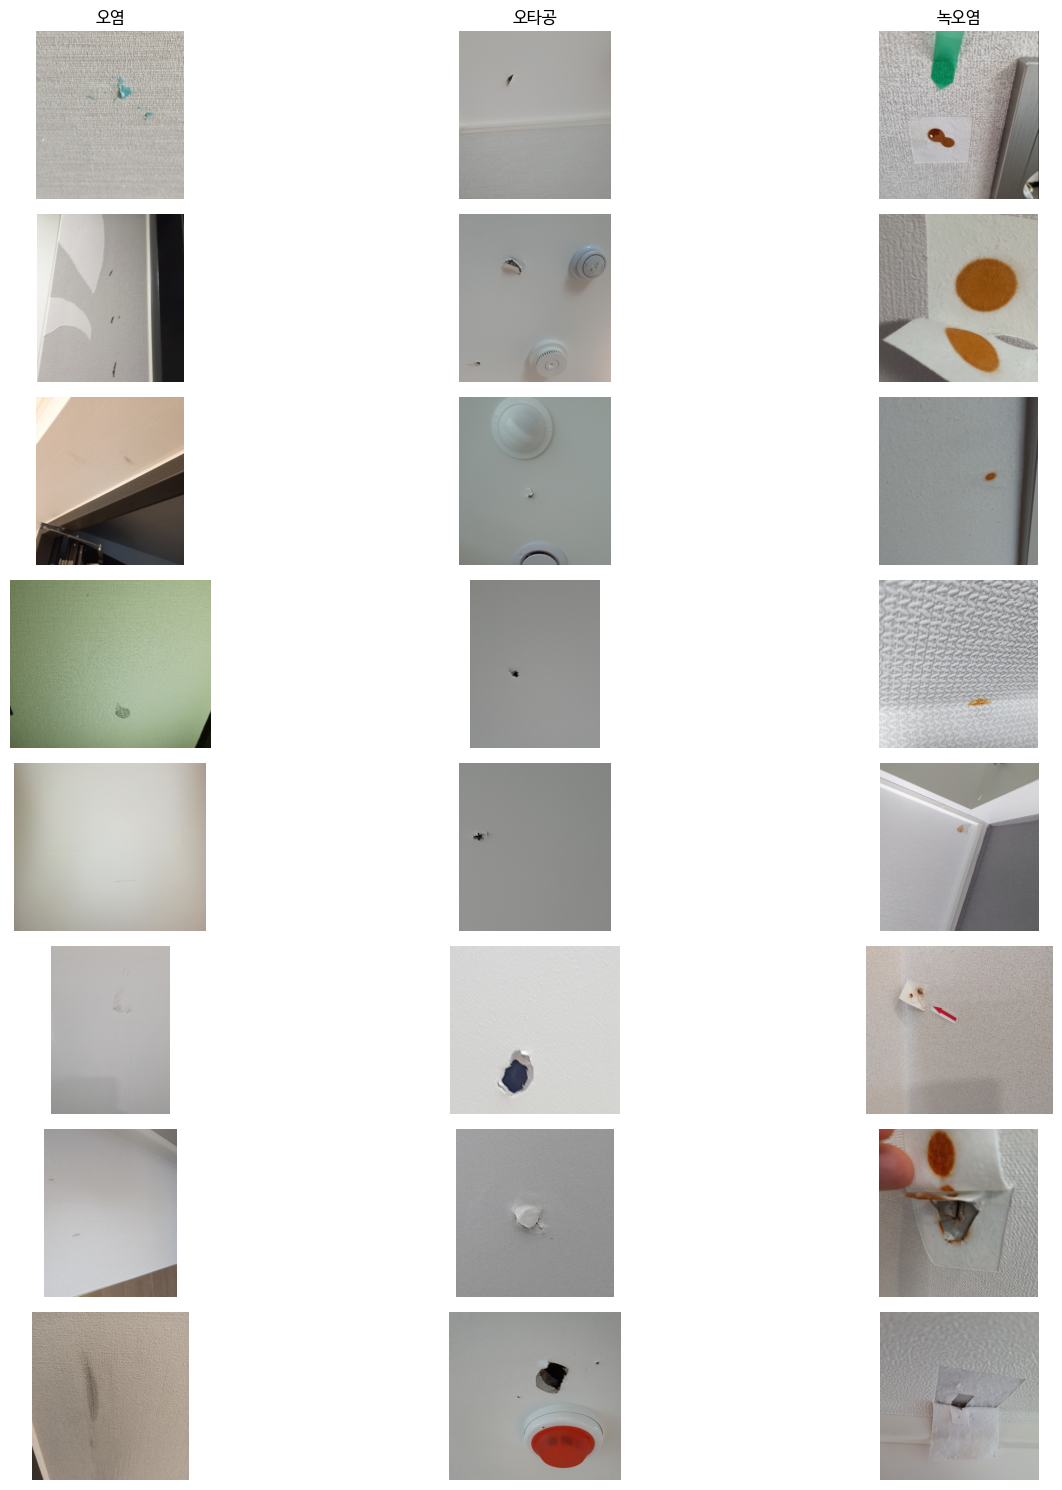

In [ ]:
plot(img_samples[9:12])

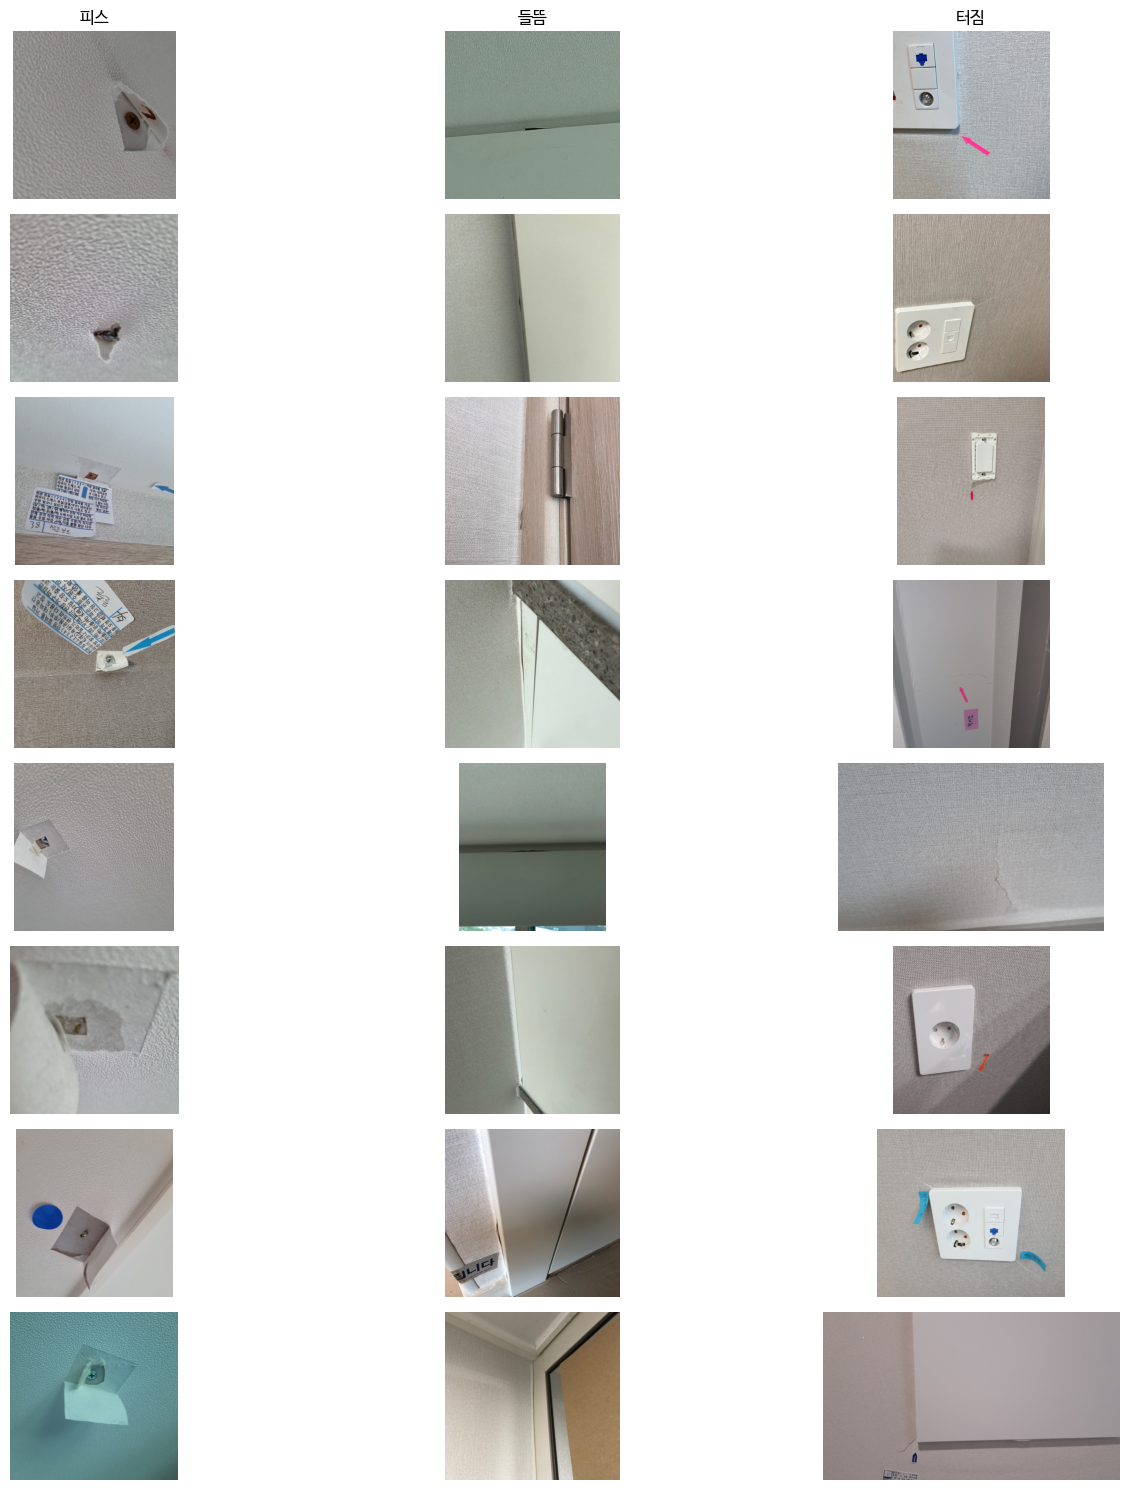

In [ ]:
plot(img_samples[12:15])

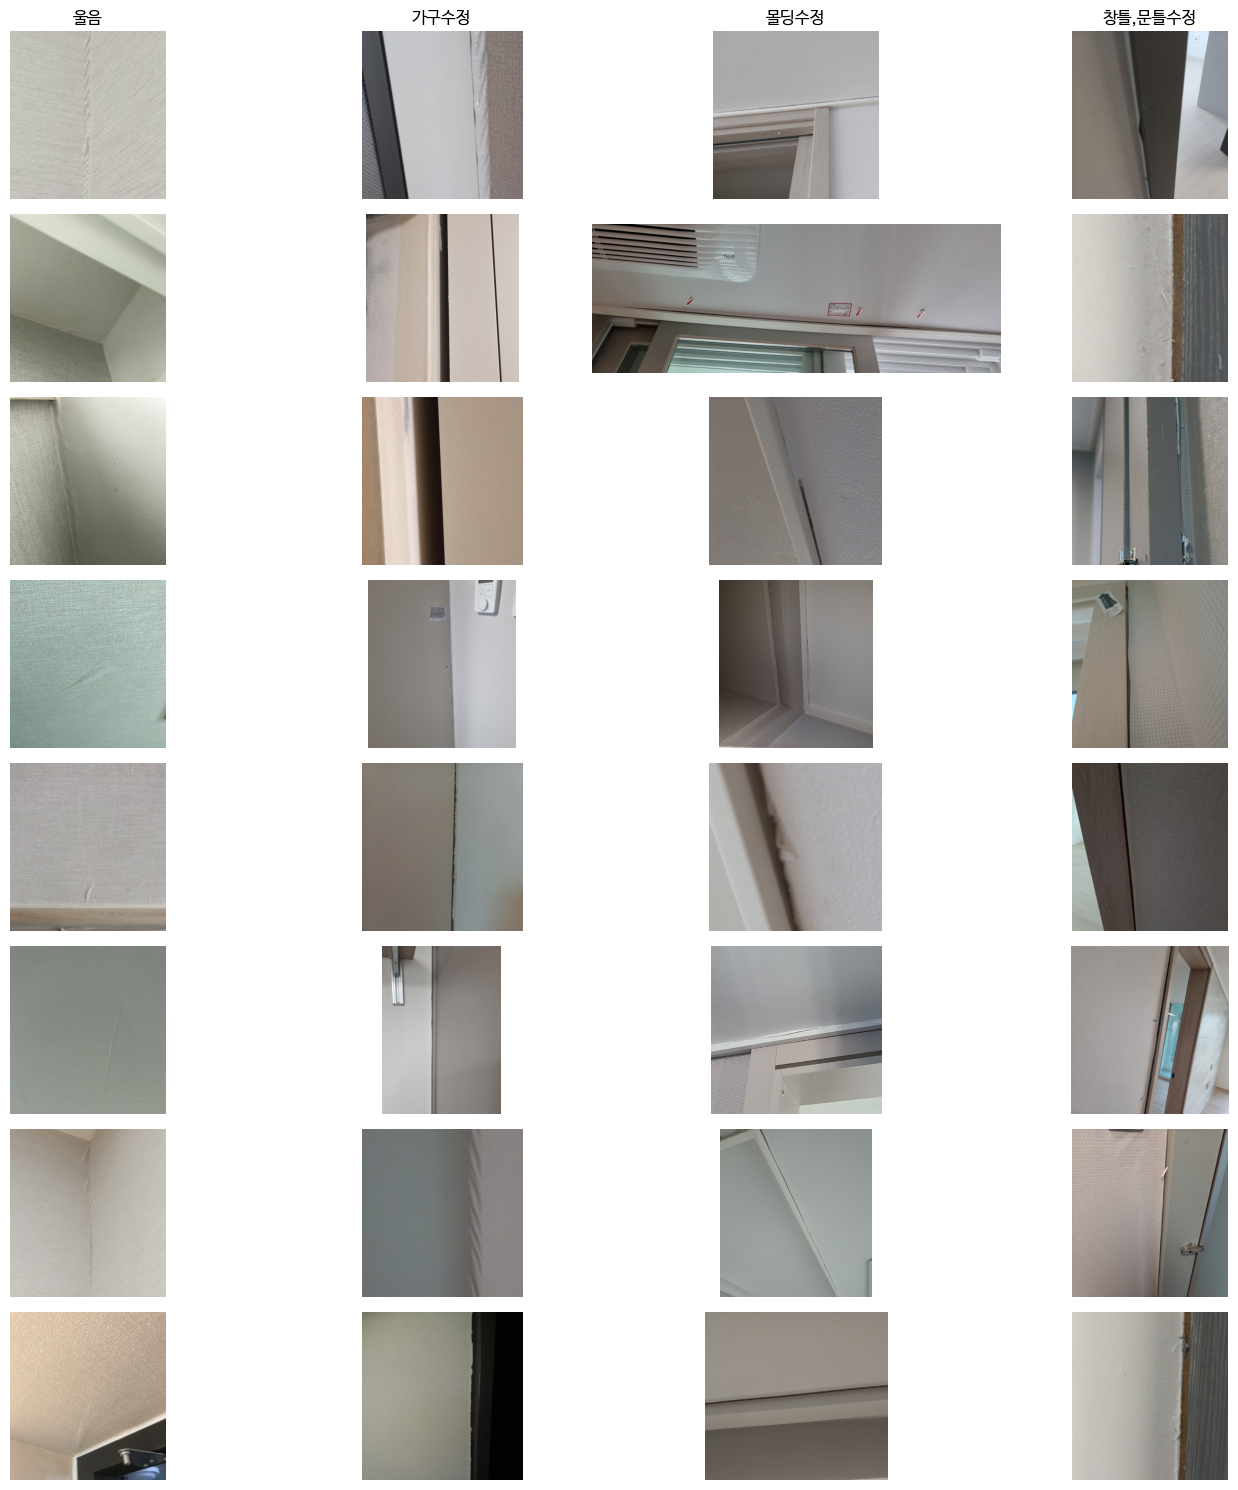

In [ ]:
plot(img_samples[15:19])

In [ ]:
labels = os.listdir(TRAIN_PATH)

img_df = {
    'label': [],
    'length': []
}

for label in labels:
    img_df['label'].append(label)
    cur_path = os.path.join(TRAIN_PATH, label)
    img_df['length'].append(len(os.listdir(cur_path)))

img_df = pd.DataFrame(img_df)
img_df.sort_values(by='length')

label  length
5        반점       3
6      틈새과다       5
16     가구수정      12
11      녹오염      14
8     이음부불량      17
15       울음      22
18  창틀,문틀수정      27
12       피스      51
13       들뜸      54
3      석고수정      57
2       면불량      99
17     몰딩수정     130
10      오타공     142
0       곰팡이     145
14       터짐     162
7        꼬임     210
1    걸레받이수정     307
9        오염     595
4        훼손    1405

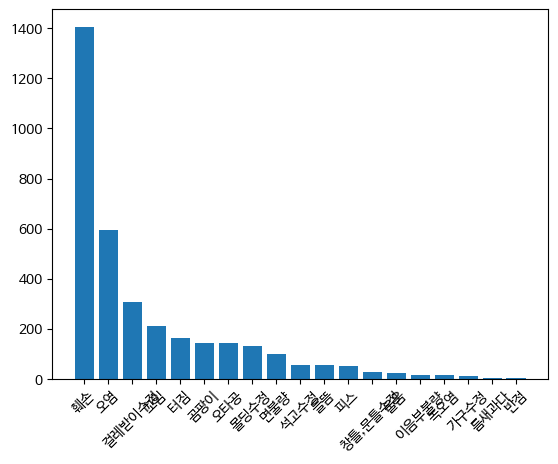

In [ ]:
img_df.sort_values(by='length', inplace=True, ascending=False)
plt.bar(data=img_df, x='label', height='length')
plt.xticks(rotation=45)
plt.show()

In [ ]:
size_list = []
for label in labels:
    cur_path = os.path.join(TRAIN_PATH, label)
    file_names = os.listdir(cur_path)
    for file_name in file_names:
        size_list.append(np.asarray(Image.open(os.path.join(cur_path, file_name))))

shapes = [x.shape for x in size_list]

sorted_by_row = sorted(shapes, key=lambda x: x[0])
sorted_by_col = sorted(shapes, key=lambda x: x[1])

shapes.sort(key=lambda x: x[0] * x[1])

print("smallest row: ", sorted_by_row[0], "largest row", sorted_by_row[1])
print("smallest col: ", sorted_by_col[0], "largest col", sorted_by_col[1])
print("smallest set: ", shapes[0], "largest set: ", shapes[-1])

smallest row:  (272, 612, 3) largest row (299, 592, 3)
smallest col:  (800, 357, 3) largest col (404, 364, 3)
smallest set:  (404, 364, 3) largest set:  (538, 1414, 3)
